In [1]:
# import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
# import scikit tools to read boston dataset
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')
#Preview test
test.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN


In [3]:
train.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.80573,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes


In [4]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [5]:
# create dictionary of ordinal to integer mapping
ord= {'yes':1, 'no':0 }
# apply using map

train['default_status'] = train.default_status.map(ord)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field9    -0.206441
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field31   -0.118339
form_field7    -0.113481
form_field13   -0.089314
form_field44   -0.066595
form_field48   -0.060161
form_field50   -0.049732
form_field12   -0.042858
form_field14    0.008272
form_field11    0.033700
form_field24    0.064261
form_field5     0.088912
form_field41    0.118484
form_field20    0.127612
form_field19    0.134433
form_field39    0.145949
form_field4     0.147548
form_field34    0.151109
form_field38    0.151966
form_field49    0.152407
form_field45    0.154638
form_field40    0.164199
form_field36    0.167306
form_field3     0.193603
form_field46    0.196138


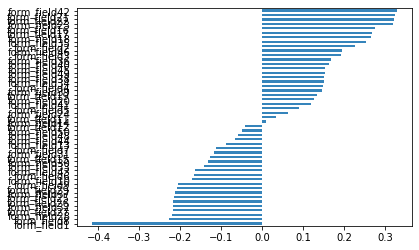

In [6]:
tst = train.corr()['default_status'].copy()
tst = tst.drop('default_status')
tst.sort_values(inplace=True)
tst.plot(kind='barh', alpha = 0.9)
print(tst)

In [7]:
#Making a copy of the training and test data
df_test= test.copy() 
df_train= train.copy()

In [8]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


form_field40      78.087500
form_field31      70.371429
form_field41      68.266071
form_field11      56.108929
form_field45      55.923214
form_field23      50.219643
form_field30      45.551786
form_field35      41.335714
form_field15      40.133929
form_field48      37.301786
form_field22      36.428571
form_field46      28.400000
form_field21      28.310714
form_field6       23.857143
form_field8       23.857143
form_field24      23.744643
form_field16      23.278571
form_field17      19.912500
form_field50      19.742857
form_field18      18.575000
form_field12      17.669643
form_field27      16.605357
form_field9       14.300000
form_field26      13.282143
form_field13      10.516071
form_field25       9.732143
form_field32       9.732143
form_field37       9.732143
form_field44       9.612500
form_field7        9.219643
form_field39       7.519643
form_field2        6.864286
form_field1        4.516071
form_field36       3.562500
form_field42       2.362500
form_field33       2

In [9]:
#drop MRG because it contains a single Unique value
#drop ZONE1 and ZONE2 because it contains too much missing values
df_train.drop(['form_field40','form_field31','form_field41','form_field11','form_field45', 'form_field23'], axis =1, inplace = True)
df_test.drop(['form_field40','form_field31','form_field41','form_field11','form_field45', 'form_field23'], axis =1, inplace = True)

In [10]:
df_train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.0,0.392854,2.02,0.711632,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.0,0.314281,8.08,0.183584,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.0,0.162965,18.18,0.791136,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,1.0,0.488884,2.02,0.685168,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.0,0.275000,12.12,0.438168,0.0,charge,97.887502,1.427891,0.045630,0


In [11]:
### Filling Missing Values

In [12]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


form_field30      45.551786
form_field35      41.335714
form_field15      40.133929
form_field48      37.301786
form_field22      36.428571
form_field46      28.400000
form_field21      28.310714
form_field6       23.857143
form_field8       23.857143
form_field24      23.744643
form_field16      23.278571
form_field17      19.912500
form_field50      19.742857
form_field18      18.575000
form_field12      17.669643
form_field27      16.605357
form_field9       14.300000
form_field26      13.282143
form_field13      10.516071
form_field32       9.732143
form_field25       9.732143
form_field37       9.732143
form_field44       9.612500
form_field7        9.219643
form_field39       7.519643
form_field2        6.864286
form_field1        4.516071
form_field36       3.562500
form_field42       2.362500
form_field33       2.242857
form_field43       1.014286
form_field5        0.633929
form_field49       0.633929
form_field10       0.633929
form_field29       0.633929
form_field28       0

In [13]:
df_train.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64
form_field39      float64
form_field42      float64
form_field43

In [14]:
df_train.form_field47.nunique()
df_train.form_field47.head()

0    charge
1    charge
2    charge
3    charge
4    charge
Name: form_field47, dtype: object

In [15]:
df_train = df_train.drop('Applicant_ID', axis =1)
df_test = df_test.drop('Applicant_ID', axis =1)
#Return the column namesn with object datatype
obj_dtype= df_train.select_dtypes(include=['object']).columns
obj_dtype

Index(['form_field47'], dtype='object')

In [16]:
df_train.form_field47.nunique()
df_train.form_field47.head()

#Return the column namesn with object datatype
obj_dtype= df_train.select_dtypes(include=['object']).columns
obj_dtype

#Encode all categorical variables
df_train =pd.get_dummies(df_train, columns= obj_dtype)
df_test = pd.get_dummies(df_test, columns= obj_dtype)
df_train.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field12', 'form_field13',
       'form_field14', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field24', 'form_field25', 'form_field26',
       'form_field27', 'form_field28', 'form_field29', 'form_field30',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field42', 'form_field43', 'form_field44', 'form_field46',
       'form_field48', 'form_field49', 'form_field50', 'default_status',
       'form_field47_charge', 'form_field47_lending'],
      dtype='object')

form_field1            -0.414826
form_field47_lending   -0.227926
form_field8            -0.227655
form_field28           -0.220421
form_field27           -0.218191
form_field32           -0.218091
form_field26           -0.218068
form_field25           -0.215165
form_field37           -0.213527
form_field29           -0.209252
form_field9            -0.206441
form_field10           -0.170323
form_field6            -0.165438
form_field43           -0.165155
form_field33           -0.140934
form_field30           -0.132381
form_field15           -0.127264
form_field7            -0.113481
form_field13           -0.089314
form_field44           -0.066595
form_field48           -0.060161
form_field50           -0.049732
form_field12           -0.042858
form_field14            0.008272
form_field24            0.064261
form_field5             0.088912
form_field20            0.127612
form_field19            0.134433
form_field39            0.145949
form_field4             0.147548
form_field

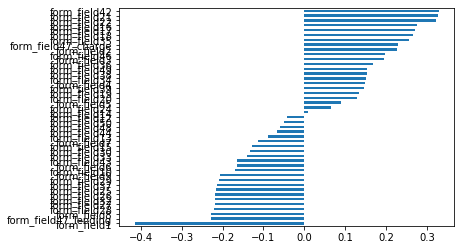

In [17]:
tst1 = df_train.corr()['default_status'].copy()
tst1= tst1.drop('default_status')
tst1.sort_values(inplace=True)
tst1.plot(kind='barh', alpha = 1)
tst1

In [19]:
#fill NA with mean() of each column in  dataset
df_train1 = df_train.copy()
df_test1 = df_test.copy()


df_train1 = df_train1.apply(lambda x: x.fillna(x.median()),axis=0)
df_test1 = df_test1.apply(lambda x: x.fillna(x.median()),axis=0)

df_ = pd.DataFrame({'test':df_test1.isna().sum(), 'train':df_train1.isna().sum()})
df_

,test,train
default_status,NaN,0
form_field1,0.0,0
form_field10,0.0,0
form_field12,0.0,0
form_field13,0.0,0
form_field14,0.0,0
form_field15,0.0,0
form_field16,0.0,0
form_field17,0.0,0
form_field18,0.0,0


In [21]:
tst1 = df_train1.corr()['default_status'].copy()
tst1= tst1.drop('default_status')
tst1.sort_values(inplace=True)
tst1

form_field1            -0.402483
form_field47_lending   -0.227926
form_field8            -0.221136
form_field28           -0.219289
form_field32           -0.215621
form_field9            -0.209977
form_field37           -0.208794
form_field29           -0.208564
form_field25           -0.207944
form_field26           -0.206425
form_field27           -0.202047
form_field10           -0.169665
form_field6            -0.166398
form_field43           -0.164295
form_field33           -0.140002
form_field7            -0.114472
form_field15           -0.104998
form_field13           -0.089051
form_field30           -0.088812
form_field12           -0.067367
form_field44           -0.057371
form_field48           -0.055400
form_field50           -0.048936
form_field14            0.008272
form_field24            0.041483
form_field5             0.088699
form_field20            0.127289
form_field39            0.129348
form_field19            0.134426
form_field4             0.147164
form_field

In [22]:
train_new= df_train1.drop(['form_field1','form_field47_lending','form_field8','form_field28',
                           'form_field32','form_field9','form_field37',
                           'form_field29','form_field25','form_field26',
                           'form_field27','form_field10','form_field6',
                           'form_field43','form_field33','form_field7',
                           'form_field15','form_field13','form_field30',
                           'form_field12','form_field44','form_field48','form_field50'], axis =1)

test_new = df_test1.drop(['form_field1','form_field47_lending','form_field8','form_field28',
                          'form_field32','form_field9','form_field37',
                          'form_field29','form_field25','form_field26',
                          'form_field27','form_field10','form_field6',
                          'form_field43','form_field33','form_field7',
                          'form_field15','form_field13','form_field30',
                          'form_field12','form_field44','form_field48','form_field50'], axis =1)




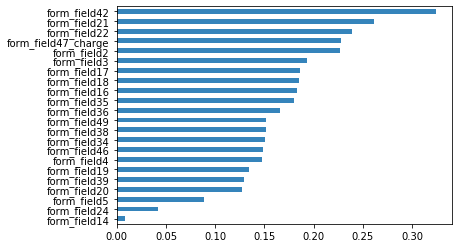

In [23]:
tst2 = train_new.corr()['default_status'].copy()
tst2 = tst2.drop('default_status')
tst2.sort_values(inplace=True)
tst2.plot(kind='barh', alpha = 0.9)

In [24]:
tst2.sort_values(inplace=True)
tst2

form_field14           0.008272
form_field24           0.041483
form_field5            0.088699
form_field20           0.127289
form_field39           0.129348
form_field19           0.134426
form_field4            0.147164
form_field46           0.148286
form_field34           0.150717
form_field38           0.151571
form_field49           0.151983
form_field36           0.166255
form_field35           0.180188
form_field16           0.182775
form_field18           0.185327
form_field17           0.186246
form_field3            0.193049
form_field2            0.226610
form_field47_charge    0.227926
form_field22           0.239133
form_field21           0.261410
form_field42           0.323752
Name: default_status, dtype: float64

## Modelling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



In [26]:
X = train_new.drop('default_status', axis = 1)
y = train_new['default_status']


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((33600, 22), (33600,), (22400, 22), (22400,))

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [28]:
#A simple loop to help pick an algorithm

seed = 7
models = []
models.append(('Lr', LogisticRegression()))
models.append(('RFA', RandomForestClassifier()))
models.append(('gbm', GradientBoostingClassifier()))
models.append(('Decision_Tree', DecisionTreeClassifier()))
models.append(('xgb', XGBClassifier(n_estimators = 50)))
models.append(('Catboost', CatBoostClassifier(silent = True)))
models.append(('LGBM', LGBMClassifier(silent = True)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results.append(score)
    names.append(name)
    msg = "%s: %f " % (name, score)
    print(msg)

Lr: 0.807437 
RFA: 0.808053 
gbm: 0.818633 
Decision_Tree: 0.622814 
xgb: 0.812787 
Catboost: 0.820101 
LGBM: 0.818867 


In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
score = roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1])
print('score_metric: {a} '.format(a = score ))

# Predicting on the test set
test_pred = gbm.predict(test_new) #predict on the test set for submission

df = {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred}
sub = pd.DataFrame(data=df)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('submissiongbm.csv', index = False)

In [ ]:
cbr = CatBoostClassifier()
parameters = {'depth': [2,3,4,5,6],
              'learning_rate' : [0.02, 0.05, 0.1,0.9,1.0],
              'iterations'    : [40,60,90,120],
              'loss_function' : ['Logloss'],
              'eval_metric'   : ['AUC']}
cbr_grid = GridSearchCV(estimator=cbr, param_grid = parameters, cv = 5, n_jobs=-1)
cbr_grid.fit(X_train, y_train)   


print(cbr_grid.best_params_)

In [ ]:
cbr = CatBoostClassifier(depth = 6, learning_rate = 0.05 , iterations = 120, eval_metric = 'AUC', loss_function = 'Logloss')

cbr.fit(X_train, y_train, eval_set = (X_test, y_test), plot=True)

#Calculate AUC
score = roc_auc_score(y_test, cbr.predict_proba(X_test)[:,1])
print('score_metric: {a} '.format(a = score))

# Predicting on the test set
test_pred_cbr = cbr.predict_proba(test_new)[:,1] #predict on the test set for submission

df_cbr= {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred_cbr}
sub = pd.DataFrame(data=df_cbr)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('submissioncbrmed_1.csv', index = False)

In [ ]:
'n_estimators':range(20,81,20)
'max_depth':range(5,16,3),
'min_samples_split':range(200,1001,200),
'min_samples_leaf':range(20,71,10),
'max_features':range(7,20,2),
'subsample':[0.6,0.7,0.8,0.9]}


In [ ]:
### Fine tunning Parameters


In [ ]:

param_test1 = {'n_estimators':range(20,81,20),
               'max_depth':range(5,16,3),
               'min_samples_split':range(200,1001,200),
               'min_samples_leaf':range(20,71,10),
               'max_features':range(7,20,2),
               'subsample':[0.6,0.7,0.8,0.9]}
               
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch1.fit(X_train,y_train)

In [ ]:
print(gsearch1.best_score_)
print(gsearch1.best_params_)

In [ ]:
gbm = GradientBoostingClassifier(learning_rate=0.9, n_estimators= 20,
                                 max_depth =5, min_samples_split = 800,
                                 min_samples_leaf = 30, random_state=10,
                                 max_features = 9, subsample = 0.7)

gbm.fit(X_train, y_train)
score = roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1])
print('score_metric: {a} '.format(a = score ))

# Predicting on the test set
test_pred = gbm.predict(test_new) #predict on the test set for submission

df = {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred}
sub = pd.DataFrame(data=df)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('submissiongbm.csv', index = False)